In [3]:
import numpy as np
from PIL import Image

img = np.array(Image.open("extintor.jpg"))

#mascara = np.array([[-1, -2, -1], 
#                    [0, 0, 0], 
#                    [1, 2, 1]])

mascara = np.array([[-1, -1, -1], 
                    [-1,  8, -1], 
                    [-1, -1, -1]])

#mascara = mascara / 25 #normalización de la mascara

filas,columnas,canales = img.shape# obtención de los tamaños de las imagenes 

mascaraf, mascaraC = mascara.shape
bordeH = int((mascaraf-1)/2)
bordeA = int((mascaraC-1)/2)
matrizF = np.zeros((filas + (mascaraf-1), columnas + (mascaraC-1),canales))#matriz mas grande para eviatar el desbordamiento

matrizF[bordeH:filas+bordeH, bordeA:columnas+bordeA] = img # se copia la imagen 

matrizfinal = np.zeros_like(img)# se genera la matriz en donde se almacenan los datos 

for i in range(bordeH, filas + bordeH):
    for j in range(bordeA, columnas + bordeA):
        matrizfinal[i-bordeH, j-bordeA, 0] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 0])
        matrizfinal[i-bordeH, j-bordeA, 1] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 1])
        matrizfinal[i-bordeH, j-bordeA, 2] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 2])

def umbralizacion(imagen):
    umbral = 250
    # creación de una matriz de ceros con tamaño igual a la imagen
    resultado = np.zeros_like(imagen)
    
    # asignación de 255 o 0 según el valor del umbral
    resultado[imagen > umbral ] = 255
    resultado[imagen < umbral ] = 0
    
    return resultado

final=umbralizacion(matrizfinal)

#se imprime la imagen
Aimg = Image.fromarray(final)
Aimg.show()

In [ ]:
img = Image.open('prueba2.jpg')
imgarr= np.array(img)
height,width,ca = imgarr.shape
gris = np.zeros_like(imgarr)

for h in range(height):
     for w in range(width):
       gris[h][w] = (imgarr[h][w][0] * 0.21) + (imgarr[h][w][1] * 0.72) + (imgarr[h][w][2] * 0.07)

In [1]:
import numpy as np
from PIL import Image

imgori = Image.open('extintor.jpg')
imgarr= np.array(imgori)
filas,columnas,ca = imgarr.shape


img = np.dot(imgarr[...,:3], [0.21, 0.72, 0.07])


h,w=img.shape

mascara_x = np.array([[-1, 0, 1], 
                      [-2, 0, 2], 
                      [-1, 0, 1]])

mascara_y = np.array([[-1, -2, -1], 
                      [ 0,  0,  0], 
                      [ 1,  2,  1]])

mascaraf, mascaraC = mascara_x.shape
bordeH = int((mascaraf-1)/2)
bordeA = int((mascaraC-1)/2)
matrizF = np.zeros((filas + (mascaraf-1), columnas + (mascaraC-1)))#matriz mas grande para eviatar el desbordamiento

matrizF[bordeH:filas+bordeH, bordeA:columnas+bordeA] = img # se copia la imagen 

matrizfinal_x = np.zeros_like(img)# se genera la matriz en donde se almacenan los datos 
matrizfinal_y = np.zeros_like(img)
gradiente = np.zeros_like(img)

#for i in range(bordeH, filas+bordeH):
#        for j in range(bordeA, columnas+bordeA):
#    
#            trozo = matrizF[i-bordeH:i+bordeH +1, j-bordeA:j+bordeA+1]
#            matrizfinal_x[i-bordeH, j-bordeA] = (trozo * mascara_x).sum()
#            matrizfinal_y[i-bordeH, j-bordeA] = (trozo * mascara_y).sum()
#            gradiente[i-bordeH, j-bordeA] = np.sqrt((matrizfinal_x[i-bordeH, j-bordeA]**2) + (matrizfinal_y[i-bordeH, j-bordeA]**2))

for i in range(bordeH, filas + bordeH):
    for j in range(bordeA, columnas + bordeA):
        matrizfinal_x[i-bordeH, j-bordeA] = np.sum(mascara_x * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1])
        matrizfinal_y[i-bordeH, j-bordeA] = np.sum(mascara_y * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1])
        gradiente[i-bordeH, j-bordeA] = np.sqrt((matrizfinal_x[i-bordeH, j-bordeA]**2) + (matrizfinal_y[i-bordeH, j-bordeA]**2))


umbral = 20
for i in range(gradiente.shape[0]):
    for j in range(gradiente.shape[1]):
            if gradiente[i,j] < umbral:
                gradiente[i,j] = 0
            else:
                gradiente[i,j] = 255


#se imprime la imagen
Ximg = Image.fromarray(matrizfinal_x)
Ximg.show()

Yimg = Image.fromarray(matrizfinal_y)
Yimg.show()

gradiente= Image.fromarray(gradiente)
gradiente.show()

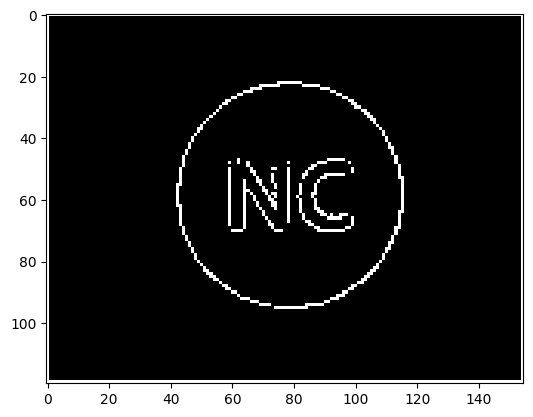

In [14]:
import numpy as np
from matplotlib import pyplot as plt

# función para aplicar una convolución 2D a una imagen
def convolucion_2d(imagen, kernel):
    # obtención de los tamaños de la imagen y el kernel
    alto, ancho = imagen.shape
    k_alto, k_ancho = kernel.shape
    
    # cálculo del borde para evitar desbordamiento
    bordeH = int((k_alto-1)/2)
    bordeW = int((k_ancho-1)/2)
    
    # creación de una matriz de ceros con tamaño ampliado
    imagen_ampliada = np.zeros((alto + bordeH*2, ancho + bordeW*2))
    imagen_ampliada[bordeH:-bordeH, bordeW:-bordeW] = imagen
    
    # creación de una matriz de ceros para almacenar los resultados
    resultado = np.zeros_like(imagen)
    
    # aplicación del kernel a cada píxel de la imagen
    for i in range(bordeH, alto+bordeH):
        for j in range(bordeW, ancho+bordeW):
            trozo = imagen_ampliada[i-bordeH:i+bordeH+1, j-bordeW:j+bordeW+1]
            resultado[i-bordeH, j-bordeW] = (trozo * kernel).sum()
    
    return resultado

# función para aplicar una umbralización a una imagen
def umbralizacion(imagen, umbral):
    # creación de una matriz de ceros con tamaño igual a la imagen
    resultado = np.zeros_like(imagen)
    
    # asignación de 255 o 0 según el valor del umbral
    resultado[imagen > umbral] = 255
    
    return resultado

# lectura de la imagen
imagen = plt.imread("circulo2.jpg")

# definición del kernel para la convolución
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

# aplicación de la convolución
convolucionada = convolucion_2d(imagen.mean(axis=2), kernel)

# aplicación de la umbralización
umbralizada = umbralizacion(convolucionada, 150)

# visualización de la imagen umbralizada
plt.imshow(umbralizada, cmap="gray")
plt.show()


Lo que el chat genero

In [17]:
from PIL import Image
import numpy as np

from scipy import signal 


# Cargar imagen a color
img = Image.open("extintor.jpg")

# Convertir la imagen a una matriz numpy
img_array = np.array(img)

# Convertir la imagen a escala de grises utilizando la fórmula de luminancia
gray_img = np.dot(img_array[...,:3], [0.21, 0.72, 0.07])

# Crear los kernels para aplicar el filtro Sobel en las direcciones x e y
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Aplicar el filtro Sobel en las direcciones x e y para obtener los gradientes
grad_x = signal.convolve2d(gray_img, sobel_x, mode="same")
grad_y = signal.convolve2d(gray_img, sobel_y, mode="same")

# Calcular la magnitud del gradiente en cada punto utilizando la fórmula
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

# Aplicar un umbral para obtener los bordes
threshold = 100
edges = np.where(grad_mag > threshold, 255, 0).astype(np.uint8)


Ximg = Image.fromarray(grad_x)
Ximg.show()

Yimg = Image.fromarray(grad_y)
Yimg.show()

gradiente= Image.fromarray(edges)
gradiente.show()
# Guardar la imagen resultante
#result_img = Image.fromarray(edges)
#result_img.save("bordes.jpg")


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = plt.imread('extintor.jpg')
Aimgaaa = Image.fromarray(img)
Aimgaaa.show()

kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

img_height, img_width, img_channels = img.shape
kernel_height, kernel_width = kernel.shape
border_height = int((kernel_height - 1) / 2)
border_width = int((kernel_width - 1) / 2)
bordered_img = np.zeros((img_height + 2 * border_height, img_width + 2 * border_width, img_channels))
bordered_img[border_height:img_height + border_height, border_width:img_width + border_width, :] = img
convolved_img = np.zeros_like(img)
for c in range(img_channels):
    for i in range(img_height):
        for j in range(img_width):
            convolved_img[i, j, c] = np.sum(
               kernel * bordered_img[i:i + kernel_height, j:j + kernel_width, c])
            
threshold = 250
edges = np.where(convolved_img > threshold, 255, 0).astype(np.uint8)

Aimg = Image.fromarray(edges)
Aimg.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = plt.imread('extintor.jpg')
Aimgaaa = Image.fromarray(img)
Aimgaaa.show()

kernel = np.array([[ 0  , -0.6,  0  ], 
                   [-0.6, 3.4 , -0.6], 
                   [0   , -0.6,  0  ]])

img_height, img_width, img_channels = img.shape
kernel_height, kernel_width = kernel.shape
border_height = int((kernel_height - 1) / 2)
border_width = int((kernel_width - 1) / 2)
bordered_img = np.zeros((img_height + 2 * border_height, img_width + 2 * border_width, img_channels))
bordered_img[border_height:img_height + border_height, border_width:img_width + border_width, :] = img
convolved_img = np.zeros_like(img)
for c in range(img_channels):
    for i in range(img_height):
        for j in range(img_width):
            convolved_img[i, j, c] = np.sum(
               kernel * bordered_img[i:i + kernel_height, j:j + kernel_width, c])

Aimg = Image.fromarray(edges)
Aimg.show()


In [5]:
import numpy as np
from PIL import Image

img = np.array(Image.open("extintor.jpg"))

#mascara = np.array([[-1, -2, -1], 
#                    [0, 0, 0], 
#                    [1, 2, 1]])

mascara = np.array([[0, -0.9, 0], 
                    [-0.9, (4*0.9)+1, -0.9], 
                    [0, -0.9, 0]])

#mascara = mascara / 25 #normalización de la mascara

filas,columnas,canales = img.shape# obtención de los tamaños de las imagenes 

mascaraf, mascaraC = mascara.shape
bordeH = int((mascaraf-1)/2)
bordeA = int((mascaraC-1)/2)
matrizF = np.zeros((filas + (mascaraf-1), columnas + (mascaraC-1),canales))#matriz mas grande para eviatar el desbordamiento

matrizF[bordeH:filas+bordeH, bordeA:columnas+bordeA] = img # se copia la imagen 

matrizfinal = np.zeros_like(img)# se genera la matriz en donde se almacenan los datos 

for i in range(bordeH, filas + bordeH):
    for j in range(bordeA, columnas + bordeA):
        matrizfinal[i-bordeH, j-bordeA, 0] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 0])
        matrizfinal[i-bordeH, j-bordeA, 1] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 1])
        matrizfinal[i-bordeH, j-bordeA, 2] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 2])

#se imprime la imagen
Aimg = Image.fromarray(matrizfinal)
Aimg.show()

In [ ]:
import numpy as np
from PIL import Image

img = np.array(Image.open("extintor.jpg"))

mascara = np.array([[-1, -1, -1], 
                    [-1,  8, -1], 
                    [-1, -1, -1]])

filas,columnas,canales = img.shape# obtención de los tamaños de las imagenes 

mascaraf, mascaraC = mascara.shape
bordeH = int((mascaraf-1)/2)
bordeA = int((mascaraC-1)/2)
matrizF = np.zeros((filas + (mascaraf-1), columnas + (mascaraC-1),canales))#matriz mas grande para eviatar el desbordamiento

matrizF[bordeH:filas+bordeH, bordeA:columnas+bordeA] = img # se copia la imagen 

matrizfinal = np.zeros_like(img)# se genera la matriz en donde se almacenan los datos 

for i in range(bordeH, filas + bordeH):
    for j in range(bordeA, columnas + bordeA):
        matrizfinal[i-bordeH, j-bordeA, 0] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 0])
        matrizfinal[i-bordeH, j-bordeA, 1] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 1])
        matrizfinal[i-bordeH, j-bordeA, 2] = np.sum(mascara * matrizF[i-bordeH:i+bordeH+1, j-bordeA:j+bordeA+1, 2])

umbral = 200
for i in range(matrizfinal.shape[0]):
    for j in range(matrizfinal.shape[1]):
        for k in range(matrizfinal.shape[2]):
            if matrizfinal[i,j,k] < umbral:
                matrizfinal[i,j,k] = 0
            else:
                matrizfinal[i,j,k] = 255
#se imprime la imagen
Aimg = Image.fromarray(matrizfinal)
Aimg.show()